In [ ]:
!pip install timm
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 7.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.7 MB/s 


Files already downloaded and verified
Files already downloaded and verified
torch.Size([2, 3, 224, 224])


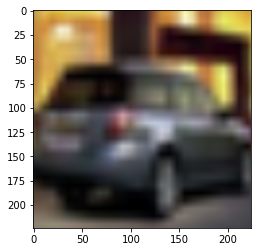

In [ ]:
import sys
import torch
import timm
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

transform_train = transforms.Compose(
    [transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10), transforms.ToTensor(), transforms.Resize(256),
    transforms.CenterCrop(224)])
transform_test = transforms.Compose(
    [transforms.ToTensor(), transforms.Resize(256),
    transforms.CenterCrop(224)])

batch_size = 20
lr = 0.00001
epochs = 100

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
batch, _ = next(iter(trainloader))
images = batch[:2]
print(images.shape)
plt.imshow(images[0].permute(1, 2, 0))
plt.imshow(images[1].permute(1, 2, 0))

In [ ]:
import sys
import torch
import timm
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

transform_train = transforms.Compose(
    [transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10), transforms.ToTensor(), transforms.Resize(256),
    transforms.CenterCrop(224)])
transform_test = transforms.Compose(
    [transforms.ToTensor(), transforms.Resize(256),
    transforms.CenterCrop(224)])

batch_size = 20
lr = 0.00001
epochs = 100

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
model = timm.create_model('ecaresnet26t', num_classes=10, pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Device {device}")
def trainAccuracy():
    
    model.eval()
    accuracy = 0.0
    total = 0.0
    
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            # run the model on the test set to predict labels
            outputs = model(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)
def testAccuracy():
    
    model.eval()
    accuracy = 0.0
    total = 0.0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            # run the model on the test set to predict labels
            outputs = model(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        sys.stdout.write(f"\repoch:{epoch + 1}, mini batch:{i + 1} loss: {loss.item():.7f}")
        sys.stdout.flush()
    print()
    print(f'[epoch:{epoch + 1}, mini batch:{i + 1}] loss: {running_loss / 2500:.5f} accuracy train: {trainAccuracy()} accuracy test: {testAccuracy()}')
    running_loss = 0.0
    torch.save(model.state_dict(), "./modeltrain.pt")
print('Finished Training')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/ecaresnet26t_ra2-46609757.pth" to /root/.cache/torch/hub/checkpoints/ecaresnet26t_ra2-46609757.pth


Device cuda
epoch:1, mini batch:2500 loss: 0.4865228
[epoch:1, mini batch:2500] loss: 1.40180 accuracy train: 79.47 accuracy test: 86.01
epoch:2, mini batch:2500 loss: 0.5410632
[epoch:2, mini batch:2500] loss: 0.44079 accuracy train: 88.086 accuracy test: 92.24
epoch:3, mini batch:2500 loss: 0.4673998
[epoch:3, mini batch:2500] loss: 0.34076 accuracy train: 89.498 accuracy test: 92.86
epoch:4, mini batch:2500 loss: 0.1474118
[epoch:4, mini batch:2500] loss: 0.29653 accuracy train: 90.972 accuracy test: 93.52
epoch:5, mini batch:2500 loss: 0.0920810
[epoch:5, mini batch:2500] loss: 0.26409 accuracy train: 91.362 accuracy test: 93.84
epoch:6, mini batch:2500 loss: 0.4136881
[epoch:6, mini batch:2500] loss: 0.23904 accuracy train: 92.72 accuracy test: 94.48
epoch:7, mini batch:2500 loss: 0.1024691
[epoch:7, mini batch:2500] loss: 0.22197 accuracy train: 93.212 accuracy test: 94.48
epoch:8, mini batch:2500 loss: 0.1878450
[epoch:8, mini batch:2500] loss: 0.20717 accuracy train: 93.746 acc

KeyboardInterrupt: ignored

In [ ]:
import sys
import torch
import timm
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
model = timm.create_model('ecaresnet26t', num_classes=10, pretrained=True)
model.load_state_dict(torch.load("./CIFAR10-ecaresnet26t.pt"))
model = model.to("cuda")

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


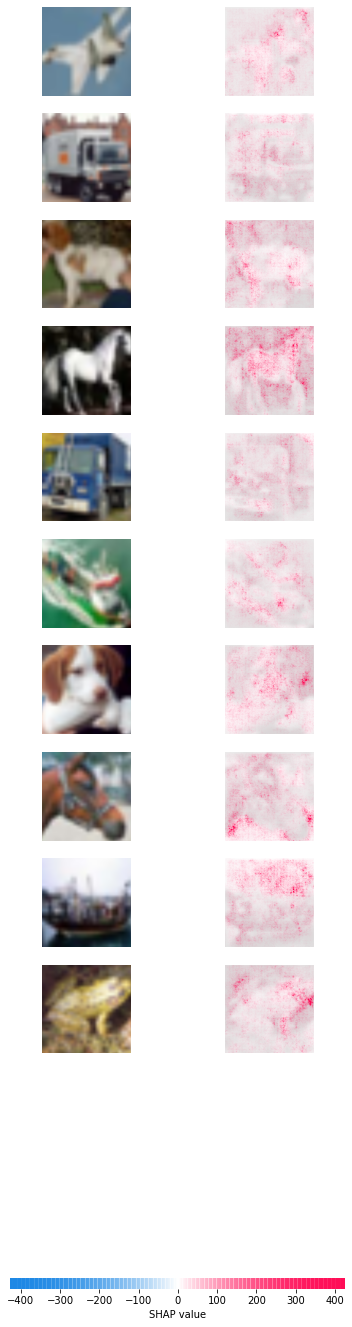

In [ ]:
Сimport shap
import logging
import numpy as np
batch = next(iter(testloader))
images,labels = batch
logging.getLogger('shap').setLevel(logging.ERROR)

background = images[:10].to("cuda")
test_images = images[10:20]
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(test_images)
shap_numpy = np.abs([np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]).mean(0)
test_numpy = (np.swapaxes(np.swapaxes(test_images.numpy(), 1, -1), 1, 2)  * 255).astype(np.uint8)
shap.plots.image(shap_numpy, test_numpy)
